In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

Linear Regression with L2 norm regularization commented


In [3]:
def cost_function(X,y,w):
  hypothesis = np.dot(X,w.T) ###calculation of hypothesis for all instances
  J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) ####as mention in the class notes
  # J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2)+(lamb/2)*np.sum(w**2) ####as mention
  return J

In [4]:
def batch_gradient_descent(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters) # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    #w = (w*(1-alpha*lamb)) -(alpha/len(y)) * np.dot(hypothesis - y, X)
    w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
    #cost_history[i] = cost_function(X,y,w,lamb)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [5]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [6]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

Linear Regression with L2 norm regularization

In [7]:
def cost_function_l2(X,y,w,lamb):
    hypothesis = np.dot(X,w.T)
    #J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(w**2)
    return J

In [8]:
def batch_gradient_descent_l2(X,y,w,alpha,iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = (w*(1-alpha*lamb)) - (alpha/len(y)) * (np.dot(hypothesis - y, X))
        cost_history[i] = cost_function_l2(X,y,w,lamb)
    return w, cost_history

In [9]:
def MB_gradient_descent_l2(X,y,w,alpha, iters, batch_size,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        
        w = w*int((1-(alpha*lamb))) - (alpha/batch_size) * (np.dot((np.dot(ind_x,w) - ind_y),np.transpose(ind_x)))
        cost_history[i] = cost_function_l2(ind_x,ind_y,w,lamb)
    return w, cost_history

In [10]:
def stochastic_gradient_descent_l2(X,y,w,alpha, iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w*(1-alpha*lamb) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        cost_history[i] = cost_function_l2(ind_x,ind_y,w,lamb)
    return w, cost_history

Linear Regression with Least Angle Regression Model

In [11]:
def cost_function_l1(X,y,w,lamb):
    hypothesis = np.dot(X,np.transpose(w))
    #J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(abs(w))
    return J

In [12]:
def batch_gradient_descent_l1(X,y,w,alpha,iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = w - (alpha/len(y)) * (np.dot(hypothesis - y, X) - (lamb/2)*np.sign(w))
        cost_history[i] = cost_function_l2(X,y,w,lamb)
    return w, cost_history

In [13]:
def stochastic_gradient_descent_l1(X,y,w,alpha, iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y) - (lamb/2)*np.sign(w))
        cost_history[i] = cost_function_l1(ind_x,ind_y,w,lamb)
    return w, cost_history

In [14]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        w = w - (alpha/batch_size) * (ind_x.T@(ind_x@w - ind_y))
        cost_history[i] = cost_function(ind_x,ind_y,w)
    return w, cost_history

TrainingData

In [15]:
dataxtr = pd.read_csv('/content/drive/MyDrive/xtr.csv',header=None)
dataytr = pd.read_csv('/content/drive/MyDrive/ytr.csv',header=None)


TestingData

In [16]:
dataxte = pd.read_csv('/content/drive/MyDrive/xte.csv',header=None)
datayte = pd.read_csv('/content/drive/MyDrive/yte.csv',header=None)


In [17]:
data_XTraining=dataxtr.values
X=data_XTraining[:,:]
# print(X)
m=X.shape[0]
xmin=np.min(X,axis=0)
xmax=np.max(X,axis=0)
# print(xmin , xmax)
X = (X- xmin)/(xmax-xmin) #Normalization
# print(X)

In [18]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones
# print(X)

In [19]:
X.shape

(55, 3)

In [20]:
data_YTraining=dataytr.values
Y=data_YTraining[:,:]
# print(Y)
m=X.shape[0]
ymin=np.min(Y,axis=0)
ymax=np.max(Y,axis=0)
# print(ymin , ymax)
y = (Y- ymin)/(ymax-ymin) #Normalization
#print(Y)

In [21]:
#Linear regression starts from here
w= np.zeros(X.shape[1]) ##weight initialization
#w=[0.5, 0.5, 0.5]
w1=np.zeros((X.shape[1]))
print(w)

[0. 0. 0.]


Batch Gradient Descent

In [22]:
alpha=0.005 ##learning rate
iters=100 ###iterations
lamb=5
batch_w,J_his = batch_gradient_descent(X,Y,w,alpha,iters,lamb)

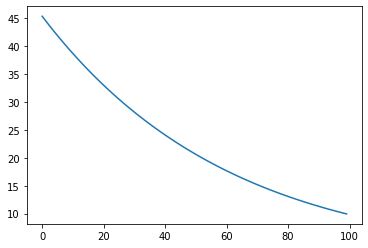

In [23]:
plt.plot(range(iters),J_his)
plt.show()

In [24]:
print(batch_w[0])

[0.45651057 0.23564335 0.26581355]


In [25]:
# print(y)

Batch Gradient Descent with L2 norm regularization

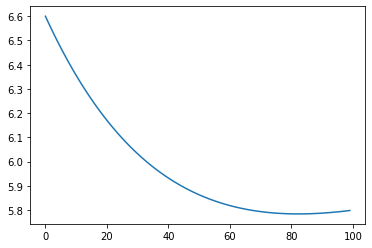

In [26]:
alpha=0.002 ##learning rate
iters=100 ###iterations
lamb=3.5
batch_w_l2,J_his_l2 = batch_gradient_descent_l2(X,y,w,alpha,iters,lamb)
plt.plot(range(iters),J_his_l2)
plt.show()

Batch Gradient Descent with L1 norm regularization

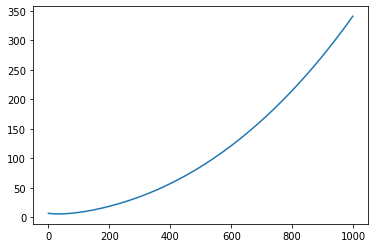

In [27]:
alpha=0.004 ##learning rate
iters=1000 ###iterations
lamb=3
batch_w,J_his = batch_gradient_descent_l1(X,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his)
plt.show()

In [28]:
# print(batch_w)

In [29]:
bgd=batch_w[-1:]
print(bgd)

[[1.78991329 1.15029434 1.18273904]]


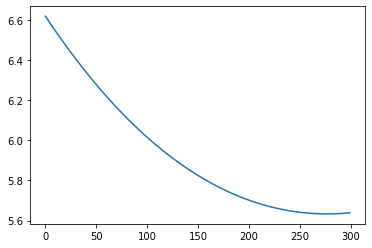

In [30]:
alpha=0.0005#learning rate
iters=300 ###iterations
lamb=3
batch_w_l1,J_his_l1 = batch_gradient_descent_l1(X,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his_l1)
plt.show()

In [31]:
# print(batch_w_l1)

In [32]:
bgd_l1=batch_w_l1[-1:]
print(bgd_l1)

[[0.09544143 0.05084858 0.05689333]]


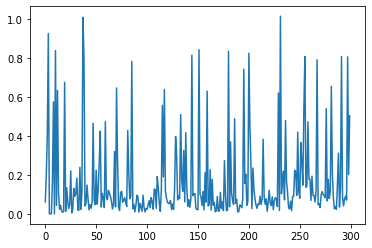

In [33]:
alpha=0.05 
iters=300 ###iterations
lamb=1
w_n,J_sgd = stochastic_gradient_descent(X,y,w,alpha, iters)

plt.plot(range(iters),J_sgd)
plt.show()

In [34]:
print(w_n)

[[0.32669834 0.32669834 0.32669834]
 [0.06385748 0.06385748 0.06385748]
 [0.12359107 0.12359107 0.12359107]]


In [35]:
sgd=w_n[-1:]
print(sgd)

[[0.12359107 0.12359107 0.12359107]]


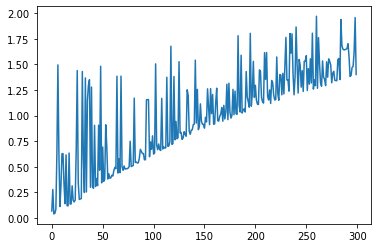

In [36]:
alpha=0.002
iters=300 ###iterations
lamb=1
w_n_l1,J_sgd_l1 = stochastic_gradient_descent_l1(X,y,w,alpha, iters,lamb)

plt.plot(range(iters),J_sgd_l1)
plt.show()

In [37]:
print(w_n_l1)

[[0.32578497 0.32578497 0.32578497]
 [0.30053543 0.30053543 0.30053543]
 [0.30745521 0.30745521 0.30745521]]


In [38]:
sgd_l1=w_n_l1[-1:]
print(sgd_l1)

[[0.30745521 0.30745521 0.30745521]]


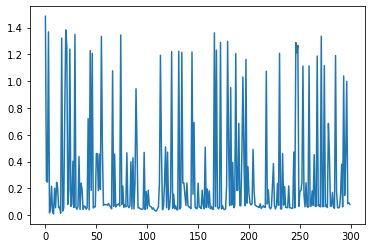

In [39]:
alpha=0.01 
iters=300 ###iterations
lamb=3
w_n_l2,J_sgd_l2 = stochastic_gradient_descent_l2(X,y,w,alpha, iters,lamb)
plt.plot(range(iters),J_sgd_l2)
plt.show()

In [40]:
print(w_n_l2)

[[0.08936464 0.08936464 0.08936464]
 [0.05460252 0.05460252 0.05460252]
 [0.06078956 0.06078956 0.06078956]]


In [41]:
sgd_l2=w_n_l2[-1:]
print(sgd_l2)

[[0.06078956 0.06078956 0.06078956]]


In [42]:
00000000000000000000000alpha=0.05 
iters=300 ###iterations
lamb=3
batch_size=25
mb_w,J_mb = MB_gradient_descent(X,y,w1,alpha, iters, batch_size)

plt.plot(range(iters),J_mb)
plt.show()

ValueError: ignored

**Performance Measures for Regression**(Self Defined functions)


Have defined these functions but have not used them because sklearn libraries were allowed to be used which I have used to find the three errors.

Mean Absolute Error

In [ ]:
def mean_abs_error(Ypre,Yact):
  sum_err=abs(Yact - Ypre)
  ma_err=sum_err/Ypre.shape[0]
  return ma_err

Mean Square Error

In [ ]:
def mean_square_error(Ypre,Yact):
  sum_error=((Yact - Ypre)**2)
  ms_err=sum_error/Ypre.shape[0]
  return ms_err

Correlation Coefficient

In [ ]:
def correlation_coeff(test_instances,Ypred,Yact):
  ypm=np.mean(Ypred)##mean of Ypred data
  yam=np.mean(Yact)##mean of Yactual data
  num=((Yact - yam)*(Ypred-ypm))
  d1=pow(((Yact - yam)**2),1/2)
  d2=pow(((Ypred - ypm)**2),1/2)
  c_c=num/(d1*d2)
  return c_c

Finding Errors

Using sklearn libraries(was allowed)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import matthews_corrcoef

In [ ]:
Xte = np.hstack((np.ones((Xte.shape[0],1)) , Xte))
Xte.shape
print(Xte)


In [ ]:
y_pred_bgd=Xte.dot(bgd.T)
print(mean_squared_error(y_pred_bgd, Yte))
print(mean_absolute_error(y_pred_bgd, Yte))
print(matthews_corrcoef(y_pred_bgd, Yte))


# y_pred_bgd_l1=Xte.dot(bgd_l1.T)
# print(mean_squared_error(y_pred_bgd_l1, Yte))
# print(mean_absolute_error(y_pred_bgd_l1, Yte))
# print(matthews_corrcoef(y_pred_bgd_l1, Yte))

# y_pred_bgd_l2=Xte.dot(bgd_l2.T)
# print(mean_squared_error(y_pred_bgd_l2, Yte))
# print(mean_absolute_error(y_pred_bgd_l2, Yte))
# print(matthews_corrcoef(y_pred_bgd_l2, Yte))

Stochastic Gradient descent

In [ ]:
y_pred_sgd=Xte.dot(sgd.T)
print(mean_squared_error(y_pred_sgd, Yte))
print(mean_absolute_error(y_pred_sgd, Yte))
print(matthews_corrcoef(y_pred_sgd, Yte))

y_pred_sgd_l1=Xte.dot(sgd_l1.T)
print(mean_squared_error(y_pred_sgd_l1, Yte))
print(mean_absolute_error(y_pred_sgd_l1, Yte))
print(matthews_corrcoef(y_pred_sgd_l1, Yte))

y_pred_sgd_l2=Xte.dot(sgd_l2.T)
print(mean_squared_error(y_pred_sgd_l2, Yte))
print(mean_absolute_error(y_pred_sgd_l2, Yte))
print(matthews_corrcoef(y_pred_sgd_l2, Yte))

Mini Batch Gradient Descent